### A referral is considered a "successful" referral if it results in an Individualized Family Service Plan (IFSP).Are there referral sources that have had higher rates of successful referrals? You can determine whether a referral was successful by looking at whether the Initial IFSP Date column is filled in or whether the Child Phase column is equal to IFSP.

isolate sucessful and unsuccessful referrals - create a loop to identify "success"
Use "initial IFSP Date" as success maker
count success by referral source
bar chart xaxis= POE, yaxis= count of referrals, 2 columns for each POE (one for successful, one for unsuccessful)

columns needed: 
Initial IFSP Date/child Phase
referral sources
POE

*rename columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
teis_df = pd.read_excel('../data/TEIS_Referral_Data_for_NSS_Compiled_Monthly.xlsx')
teis_df

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification/ Referral Date,Parent Consent Date,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,1,2016,1,NaN,NaN,2017-08-09,NaN,1,Qtr 1,NaN
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,1,2016,1,NaN,NaN,2016-07-31,1.0,1,Qtr 1,NaN
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1,2016,1,NaN,NaN,2019-02-05,NaN,1,Qtr 1,NaN
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,1,2016,1,NaN,NaN,2018-12-06,NaN,1,Qtr 1,NaN
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,1,2016,1,NaN,NaN,2018-04-18,NaN,1,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,1,2021,1,NaN,NaN,2024-04-07,NaN,4,Qtr 4,NaN
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,1,2021,1,NaN,NaN,2025-03-13,NaN,4,Qtr 4,NaN
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,1,2021,1,NaN,NaN,2025-01-05,NaN,4,Qtr 4,NaN
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,1,2021,1,NaN,NaN,2023-09-12,NaN,4,Qtr 4,NaN


In [4]:
july_df = pd.read_excel('../data/TEIS_referral_data_for_NSS_pulled_7-1-22.xlsx')
july_df

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP Date,Exit Reason,Exit Date
0,ET,411812,2016-12-14,Blount,Transitional,Notification,I,Charity Decker,2016-12-16,NaT,DCS,NaN,NaT,NaT,NaT,Unable to contact,2016-12-29
1,ET,417398,2015-04-06,Knox,Transitional,Eligibility,I,Jackie Campbell,2017-04-24,2017-05-02,Parent,Ineligible,2017-05-16,NaT,NaT,Ineligible for Part C,2017-05-16
2,ET,419400,2016-03-04,Roane,Transitional,Notification,I,Kelly Brackney,2017-06-06,NaT,DCS,NaN,NaT,NaT,NaT,Parent decline,2017-06-30
3,ET,397571,2015-05-11,Knox,Transitional,Eligibility,I,Wendy Burton,2017-05-24,2017-06-13,Other,Ineligible,2017-06-16,NaT,NaT,Ineligible for Part C,2017-06-16
4,ET,404648,2015-09-23,Knox,Transitional,IFSP,I,Sarah Scott,2016-07-18,2016-07-28,Other,Eligible,2016-08-01,2016-08-16,2018-07-24,618 - Part B eligibility not determined,2018-09-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96575,UC,519094,2020-04-10,Macon,Transitional,Eligibility,I,Sherry Roberts-DS,2022-01-12,2022-01-19,PCP,Ineligible,2022-01-31,NaT,NaT,Ineligible for Part C,2022-01-31
96576,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,PCP,Eligible,2022-05-23,2022-05-31,2022-05-31,NaN,NaT
96577,UC,525460,2019-08-27,Sumner,Competitive,Notification,I,Sherry Roberts-DS,2022-03-29,NaT,PCP,NaN,NaT,NaT,NaT,Unable to contact,2022-04-11
96578,UC,528535,2022-02-08,Smith,Transitional,Evaluation,A,Sherry Roberts-DS,2022-05-11,2022-05-27,Parent,NaN,NaT,NaT,NaT,NaN,NaT


In [5]:
july_df.columns

Index(['POE', 'Child ID', 'DOB', 'County Name', 'County SES ', 'Child Phase',
       'Active', 'Service Coordinator', 'Notification Date',
       'Parent Consent Date', 'Referral Source Type Name',
       'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date',
       'Latest IFSP Date', 'Exit Reason', 'Exit Date'],
      dtype='object')

In [6]:
july_df = july_df.drop(columns = ['DOB', 'County Name', 'Active', 'Service Coordinator', 'Notification Date', 'Parent Consent Date', 'Initial Eligibility', 'Initial Eligibility Date', 'Latest IFSP Date'])
july_df
                                                                    

,POE,Child ID,County SES,Child Phase,Referral Source Type Name,Initial IFSP Date,Exit Reason,Exit Date
0,ET,411812,Transitional,Notification,DCS,NaT,Unable to contact,2016-12-29
1,ET,417398,Transitional,Eligibility,Parent,NaT,Ineligible for Part C,2017-05-16
2,ET,419400,Transitional,Notification,DCS,NaT,Parent decline,2017-06-30
3,ET,397571,Transitional,Eligibility,Other,NaT,Ineligible for Part C,2017-06-16
4,ET,404648,Transitional,IFSP,Other,2016-08-16,618 - Part B eligibility not determined,2018-09-21
...,...,...,...,...,...,...,...,...
96575,UC,519094,Transitional,Eligibility,PCP,NaT,Ineligible for Part C,2022-01-31
96576,UC,528253,Competitive,IFSP,PCP,2022-05-31,NaN,NaT
96577,UC,525460,Competitive,Notification,PCP,NaT,Unable to contact,2022-04-11
96578,UC,528535,Transitional,Evaluation,Parent,NaT,NaN,NaT


In [11]:
july_df['successful'] = np.where(july_df['Initial IFSP Date'].isnull(), ("not_successful"), ("successful"))
july_df = july_df.rename(columns = {'Referral Source Type Name': 'referral_source'})

In [12]:
july_df

,POE,Child ID,County SES,Child Phase,referral_source,Initial IFSP Date,Exit Reason,Exit Date,successful
0,ET,411812,Transitional,Notification,DCS,NaT,Unable to contact,2016-12-29,not_successful
1,ET,417398,Transitional,Eligibility,Parent,NaT,Ineligible for Part C,2017-05-16,not_successful
2,ET,419400,Transitional,Notification,DCS,NaT,Parent decline,2017-06-30,not_successful
3,ET,397571,Transitional,Eligibility,Other,NaT,Ineligible for Part C,2017-06-16,not_successful
4,ET,404648,Transitional,IFSP,Other,2016-08-16,618 - Part B eligibility not determined,2018-09-21,successful
...,...,...,...,...,...,...,...,...,...
96575,UC,519094,Transitional,Eligibility,PCP,NaT,Ineligible for Part C,2022-01-31,not_successful
96576,UC,528253,Competitive,IFSP,PCP,2022-05-31,NaN,NaT,successful
96577,UC,525460,Competitive,Notification,PCP,NaT,Unable to contact,2022-04-11,not_successful
96578,UC,528535,Transitional,Evaluation,Parent,NaT,NaN,NaT,not_successful


In [13]:
july_df.successful.value_counts()

not_successful    51087
successful        45493
Name: successful, dtype: int64

([<matplotlib.patches.Wedge at 0x27ea3a858e0>,
 [Text(-0.1998843435066164, 2.190900784887561, 'not_successful'),
  Text(0.19988454863355165, -2.190900766173028, 'successful')])

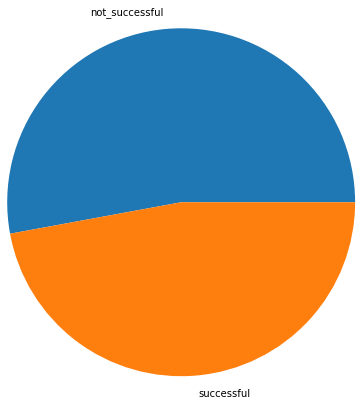

In [14]:
values = july_df['successful'].value_counts()
labels = july_df['successful'].unique().tolist()

plt.pie(values, labels = labels, radius = 2)

<BarContainer object of 96580 artists>

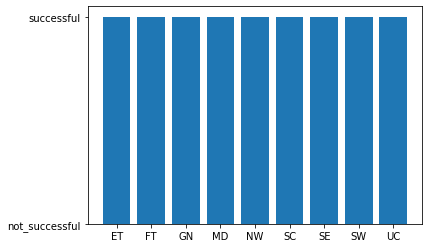

In [16]:
plt.bar(july_df.POE, july_df.successful) 